In [23]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Loading the data
SalaryData=pd.read_csv("E:\\DataSets\\Salary_dataset.csv")

In [6]:
# First ten rows
SalaryData.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [7]:
# Overall information about the dataset
SalaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [9]:
# Statistically describing the dataset
SalaryData.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [12]:
# Checking for the null values
SalaryData.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

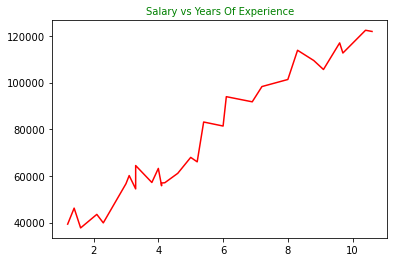

In [63]:
# Visual plots
plt.figure(8.5)
x= SalaryData['YearsExperience']
y = SalaryData['Salary']
plt.plot(x,y,color='red')
plt.title("Salary vs Years Of Experience",fontsize=10, color="green")
plt.show

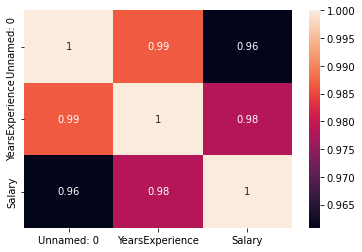

In [24]:
# Correlation between the features
sns.heatmap(SalaryData.corr(),annot= True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


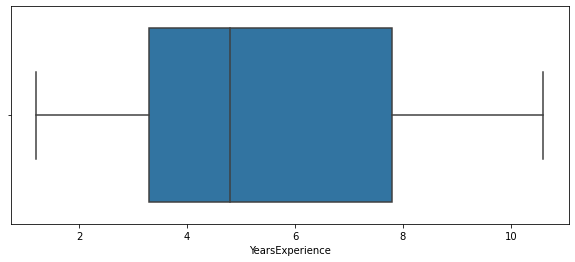

In [32]:
# Checking for outliers using boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(SalaryData['YearsExperience'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


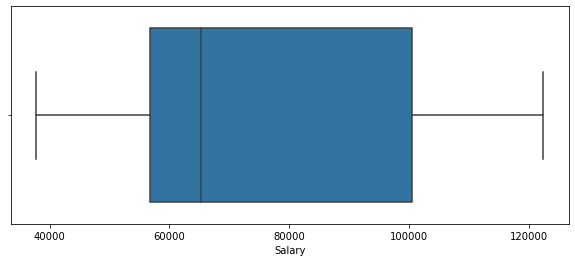

In [33]:
# Checking for outliers using boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(SalaryData['Salary'])
plt.show()

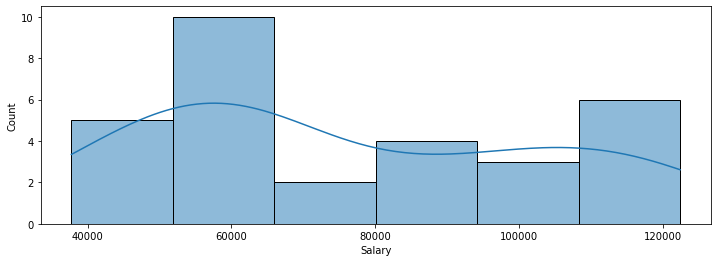

In [35]:
# Histplot
plt.figure(figsize=(12, 4))
sns.histplot(SalaryData['Salary'], kde=True)
plt.show()

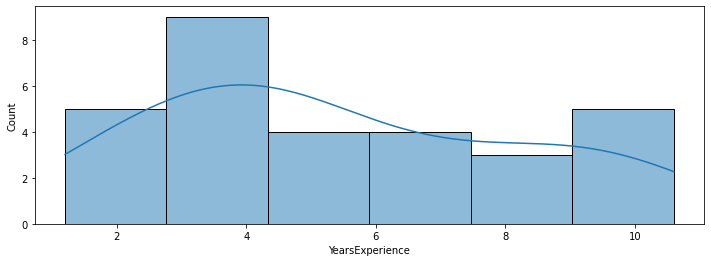

In [36]:
# Histplot
plt.figure(figsize=(12, 4))
sns.histplot(SalaryData['YearsExperience'], kde=True)
plt.show()

In [53]:
# Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=10) 

In [55]:
# Scaling the features using Standard Scalar
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x_train = SC.fit_transform(x_train.values.reshape(-1,1))
x_test = SC.transform(x_test.values.reshape(-1,1))

In [56]:
# Creating and fitting a model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred= LR.predict(x_test)  
x_pred= LR.predict(x_train)  

In [59]:
# Predicted values for the test data
y_pred=LR.predict(x_test)
y_pred

array([ 90330.26994588,  56077.98533315,  53223.62828209,  39903.29537714,
        44660.55712891,  93184.62699694,  64641.05648633, 116970.93575577,
        63689.60413598,  38000.39067643])

In [60]:
# Error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [61]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 4168.65
Mean squared error: 23682098.21
Root mean squared error: 4866.43


In [62]:
# Performance metrics
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9602319713033924